# Stable ETF analysis

In [1]:
import yfinance as yf
import pandas as pd

### In this analysis, we study a stable dividend driven ETF, which does not have a lots of price fluctuation. We should expect the model to not recommend trade almost all the time as there is not much short term price actions for us to take action to profit.

In [48]:
data = yf.download("schd", period='12mo')

[*********************100%%**********************]  1 of 1 completed


In [49]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-16,70.470001,71.739998,70.010002,71.650002,69.070877,4220800
2023-03-17,71.599998,71.599998,70.300003,70.510002,67.971916,4822100
2023-03-20,70.940002,71.769997,70.930000,71.570000,68.993752,3790200
2023-03-21,72.279999,72.449997,71.889999,72.330002,69.726395,3090100
2023-03-22,71.779999,71.930000,70.320000,70.339996,68.372353,3704300
2023-03-23,70.680000,71.220001,69.809998,70.279999,68.314041,4706900
2023-03-24,69.940002,70.919998,69.660004,70.839996,68.858368,3775500
2023-03-27,71.480003,71.570000,70.919998,71.139999,69.149979,3421300
2023-03-28,71.110001,71.489998,71.010002,71.250000,69.256912,3344600


## Problem statement

Given the last 5 days closing price (day1 to day5), if you buy at the opening on the next day (day6) , would you be able to make 3% gain in the next 5 days (day6 to day10) ? i.e., by just looking at the closing price of the last 5 days, should i place a trade on day6 with the hope of getting a 3% return on the next 5 days ? 

###  Create the input data frame. i.e. day1 to day5 dataframe

In [50]:
past_data = pd.DataFrame()

In [51]:
past_data['day1'] = data[['Close']].shift(9,axis=0)
past_data['day2'] = data[['Close']].shift(8,axis=0)
past_data['day3'] = data[['Close']].shift(7,axis=0)
past_data['day4'] = data[['Close']].shift(6,axis=0)
past_data['day5'] = data[['Close']].shift(5,axis=0)
past_data = past_data.reset_index()
past_data = past_data.drop(['Date'],axis=1)
past_data = past_data.drop([0,1,2,3,4,5,6,7,8,9])

In [52]:
past_data.head(10)

,day1,day2,day3,day4,day5
10,70.510002,71.570000,72.330002,70.339996,70.279999
11,71.570000,72.330002,70.339996,70.279999,70.839996
12,72.330002,70.339996,70.279999,70.839996,71.139999
13,70.339996,70.279999,70.839996,71.139999,71.250000
14,70.279999,70.839996,71.139999,71.250000,72.089996
15,70.839996,71.139999,71.250000,72.089996,72.300003
16,71.139999,71.250000,72.089996,72.300003,73.160004
17,71.250000,72.089996,72.300003,73.160004,73.559998
18,72.089996,72.300003,73.160004,73.559998,72.849998
19,72.300003,73.160004,73.559998,72.849998,73.019997


### get the maximum price the stock will reach on day6 to day10

In [53]:
future_data = pd.DataFrame()

In [54]:
future_data['day6'] = data[['High']].shift(4,axis=0)
future_data['day7'] = data[['High']].shift(3,axis=0)
future_data['day8'] = data[['High']].shift(2,axis=0)
future_data['day9'] = data[['High']].shift(1,axis=0)
future_data['day10'] = data[['High']]
future_data = future_data.reset_index()
future_data = future_data.drop(['Date'],axis=1)
future_data = future_data.drop([0,1,2,3,4,5,6,7,8,9])


In [55]:
future_data.head(5)

,day6,day7,day8,day9,day10
10,70.919998,71.570000,71.489998,72.120003,72.599998
11,71.570000,71.489998,72.120003,72.599998,73.209999
12,71.489998,72.120003,72.599998,73.209999,73.650002
13,72.120003,72.599998,73.209999,73.650002,73.680000
14,72.599998,73.209999,73.650002,73.680000,73.169998


In [56]:
next_five_days_max = pd.DataFrame()

In [57]:
next_five_days_max['future_max'] = future_data[["day6", "day7", "day8", "day9", "day10"]].max(axis=1)

### get the opening price of day 6

In [58]:
day6_open = pd.DataFrame()

In [59]:
day6_open['day6_open'] = data[['Open']].shift(4,axis=0)
day6_open = day6_open.reset_index()
day6_open = day6_open.drop(['Date'],axis=1)
day6_open = day6_open.drop([0,1,2,3,4,5,6,7,8,9])

In [60]:
day6_open.head(10)

,day6_open
10,69.940002
11,71.480003
12,71.110001
13,71.830002
14,72.519997
15,72.570000
16,73.309998
17,73.660004
18,72.809998
19,73.029999


### calculate the percentage gain from day6 open to the max from day6 to day10

In [61]:
gain_percent =pd.DataFrame()

In [62]:
next_five_days_max.head()

,future_max
10,72.599998
11,73.209999
12,73.650002
13,73.680000
14,73.680000


In [63]:
gain_percent['gain'] = next_five_days_max['future_max'] - day6_open['day6_open']
gain_percent['gain'] = gain_percent['gain']/day6_open['day6_open']

In [64]:
gain_percent.head()

,gain
10,0.038033
11,0.024203
12,0.035719
13,0.025755
14,0.015996


### this is the output trade or no trade on day6

In [65]:
trade = gain_percent['gain'] > 0.03

In [66]:
trade.head()

10     True
11    False
12     True
13    False
14    False
Name: gain, dtype: bool

## Try to idendify buy opportunities with KNN

In [67]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [68]:
X_train, X_test, y_train, y_test = train_test_split(past_data, trade, random_state=42)


In [69]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

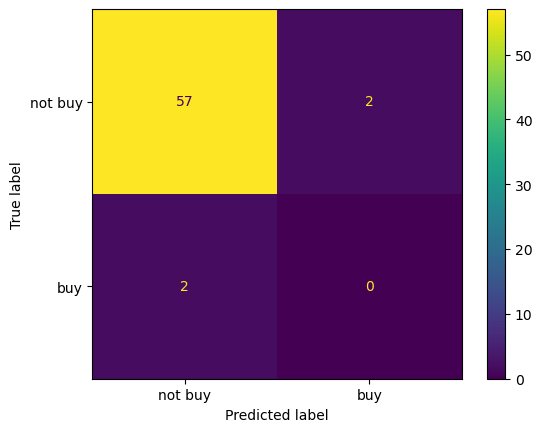

In [70]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_preds = knn_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, knn_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


As expected there is no buy recommendation predicted by the model. There are 2 buy opportunities that it missed, 2 mistake of entering the trade. It would be good improve the model to make even less mistake.

## Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
log_pipe = Pipeline([('scale', StandardScaler()), ('log', LogisticRegression())])
log_pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('log', LogisticRegression())])

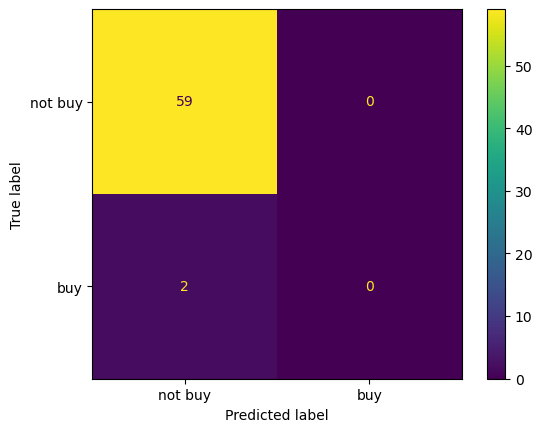

In [73]:
log_preds = log_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


This is good. The model is not recommending trade almost all the time, and it also make 0 mistake of entering a trade.

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_pred = tree_model.predict(X_test)

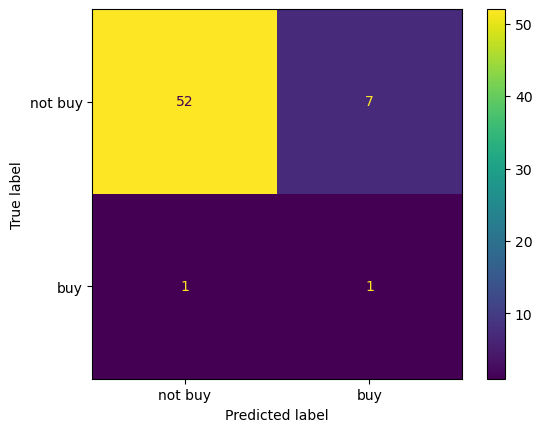

In [30]:
voo_confusion_mat = confusion_matrix(y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


This is still good as it not recommending trade most of the time, but it make more mistake of entering trade, which make it worse than KNN

## SVM

In [74]:
from sklearn.svm import SVC


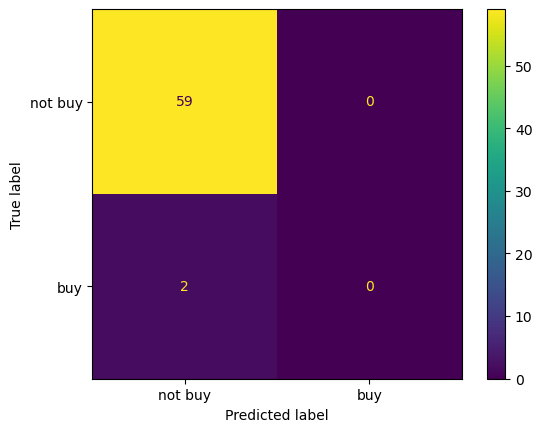

In [32]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()

This is equally good as logistic regression.

## We can further improve the models by tuning some parameters

## Improve KNN

In [75]:
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
knn_grid.fit(X_train, y_train)
best_k = knn_grid.best_params_['knn__n_neighbors']


In [76]:
best_k

3

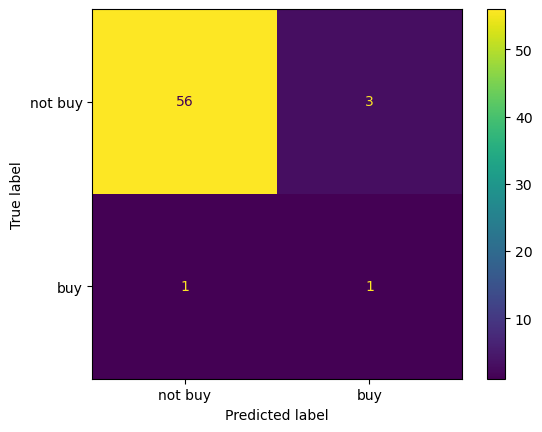

In [77]:
knn_new_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=3))])
knn_new_pipe.fit(X_train, y_train)
knn_new_preds = knn_new_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, knn_new_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()

## Improving Logistic Regression

In [78]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [79]:
import numpy as np

Cs = np.logspace(-2, 2)
coef_list = []

for C in Cs:
    lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = C, random_state=42, max_iter = 1000).fit(scaled_X_train, y_train)
    coef_list.append(list(lgr.coef_[0]))
    print(lgr.coef_)


[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[ 0.          0.          0.          0.         -0.00437349]]
[[ 0.          0.          0.          0.         -0.09952143]]
[[ 0.          0.          0.          0.         -0.19132824]]
[[ 0.          0.          0.          0.         -0.27947176]]
[[ 0.         0.         0.         0.        -0.3635266]]
[[ 0.         0.         0.         0.        -0.4430136]]
[[ 0.          0.          0.          0.         -0.51749034]]
[[ 0.         0.         0.         0.        -0.5865394]]
[[ 0.          0.          0.          0.         -0.64990408]]
[[ 0.          0.          0.          0.         -0.70752124]]
[[ 0.          0.          0.          0.         -0.75928528]]
[[ 0.         0.         0.         0.        -0.8053858]]
[[ 0.          0.       

In [80]:
np.logspace(-2, 2)

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

In [81]:
new_lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.01, random_state=42, max_iter = 1000).fit(scaled_X_train, y_train)


In [82]:
new_log_preds = new_lgr.predict(scaled_X_test)


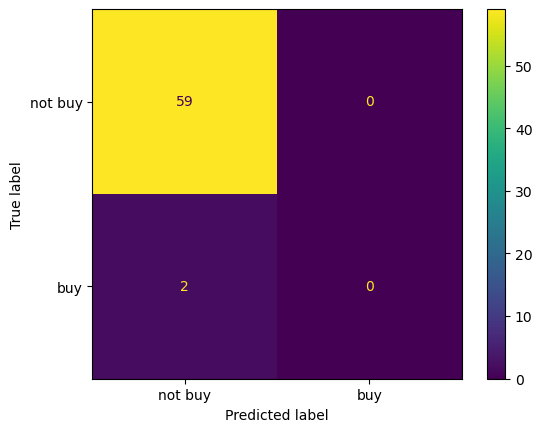

In [83]:
voo_confusion_mat = confusion_matrix(y_test, new_log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


After tuning some parameters, it does not seems like it offer any improvement

## Improving Decision Tree


In [84]:
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}

In [85]:
new_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)


In [86]:
new_tree_pred = new_tree_grid.predict(X_test)

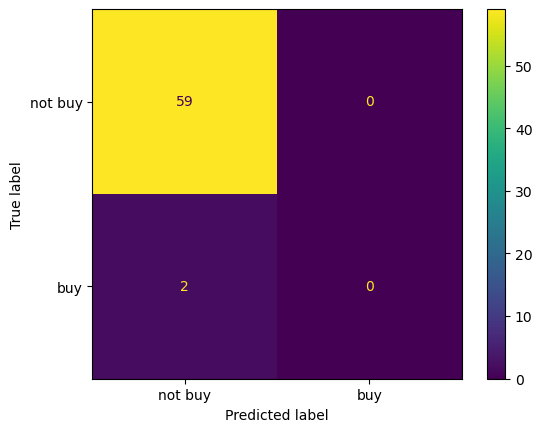

In [87]:
voo_confusion_mat = confusion_matrix(y_test, new_tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


The devision tree models has improved.

## Improving SVM

In [88]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}

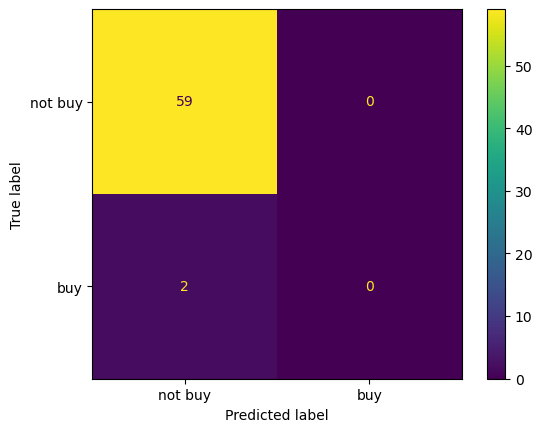

In [89]:
svc_grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
svc_grid.fit(X_train, y_train)
svc_new_pred = svc_grid.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, svc_new_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


From this analysis, we see that for ETF which is relatively stable in price, it is easy for the model to not recommend trade as it won't have enought momentum for us to take advantage. Almost all model with or without tweak give us good results.